<a href="https://colab.research.google.com/github/SilvaSebastian11/SenalesySistemas/blob/main/Ejercicio_7_de_Mayo_sebastian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte 1:
##Realizar la reconstrucción por series de Fourier de la señal $x(t)=A*rect_\frac{τ}{2} (t)$


<ipython-input-35-df9d42a3a916>:33: RuntimeWarning: divide by zero encountered in divide
  Cn = (A / (nv * np.pi)) * np.sin(nv * (np.pi/2))  # fórmula para Cn
<ipython-input-35-df9d42a3a916>:33: RuntimeWarning: invalid value encountered in multiply
  Cn = (A / (nv * np.pi)) * np.sin(nv * (np.pi/2))  # fórmula para Cn


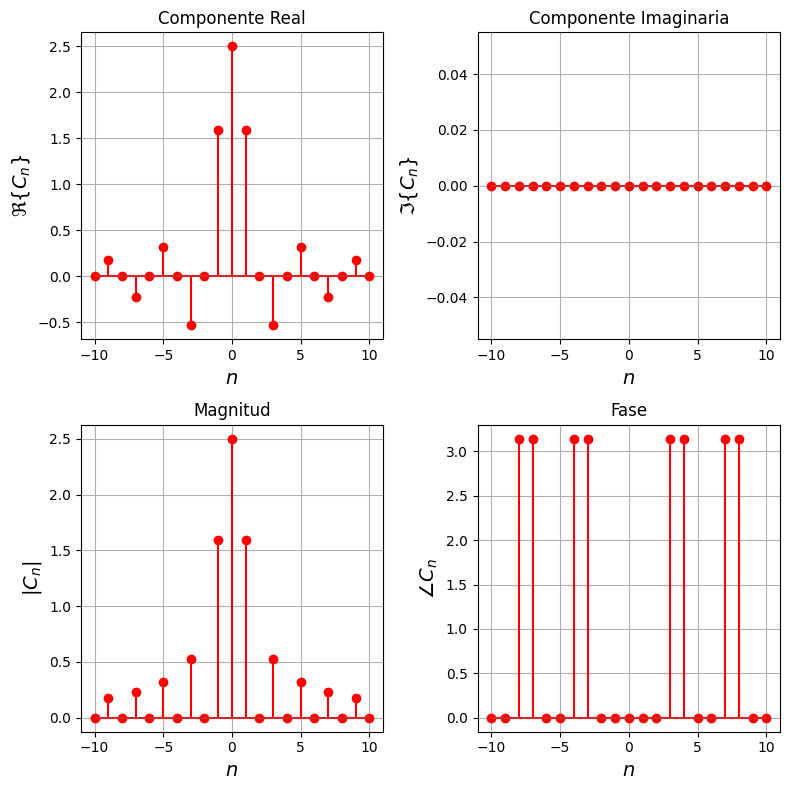

In [35]:
from matplotlib import animation, rc
from IPython.display import HTML
from ipywidgets import interact, IntSlider
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Parámetros esenciales de la señal
A = 5              # altura del pulso
T = 10             # ventana de tiempo total (s)
Fs = 100           # frecuencia de muestreo (Hz)

# Creación del vector temporal
tv = np.arange(-T/2, T/2, 1/Fs)  # instantes de muestreo centrados en cero
Nm = len(tv)                     # número total de puntos

# Ajuste de la serie de Fourier
N = 10                            # cantidad de armónicos incluidos
wo = 2 * np.pi / T               # frecuencia angular básica

# Matriz de funciones base complejas: e^{j n ω₀ t}
phin = np.zeros((Nm, 2*N + 1), dtype=np.complex128)
for n in range(-N, N + 1):
    phin[:, n + N] = np.exp(1j * n * wo * tv)

# Señal de muestra: pulso rectangular simétrico
tau = T
xo = A * (np.heaviside(tv + tau/4, 0) - np.heaviside(tv - tau/4, 0))

# Cálculo de coeficientes de Fourier\cn = np.zeros(2*N + 1, dtype=np.complex128)
nv = np.arange(-N, N + 1)           # índices de n
Cn = (A / (nv * np.pi)) * np.sin(nv * (np.pi/2))  # fórmula para Cn
Cn[N] = A / 2  # corrección del término DC (n = 0)

# Representación gráfica del espectro de Fourier
fig = plt.figure(figsize=(8, 8))

# Parte real de Cn
plt.subplot(2, 2, 1)
plt.stem(nv, np.real(Cn), 'r')        # diagrama de tallos en rojo
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$\Re\{C_n\}$', fontsize=14)
plt.title('Componente Real')
plt.axis('tight')
plt.grid(True)

# Componente imaginaria de Cn
plt.subplot(2, 2, 2)
plt.stem(nv, np.imag(Cn), 'r')       # valores imaginarios
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$\Im\{C_n\}$', fontsize=14)
plt.title('Componente Imaginaria')
plt.axis('tight')
plt.grid(True)

# Magnitud del espectro |Cn|
plt.subplot(2, 2, 3)
plt.stem(nv, np.abs(Cn), 'r')        # magnitudes absolutas
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$|C_n|$', fontsize=14)
plt.title('Magnitud')
plt.axis('tight')
plt.grid(True)

# Fase de Cn (ángulo)
plt.subplot(2, 2, 4)
plt.stem(nv, np.angle(Cn), 'r')      # ángulos en radianes
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$\angle C_n$', fontsize=14)
plt.title('Fase')
plt.axis('tight')
plt.grid(True)

fig.tight_layout()  # organiza los espacios automáticamente

In [28]:
# Cálculo de la potencia de la señal para normalizar el error
Px = A**2  # energía total de la señal

def pltest(Na=1):
    """
    Función interactiva para reconstruir la señal usando un subconjunto de armónicos
    y visualizar el error de aproximación.

    Parámetros
    ----------
    Na : int
        Número de armónicos positivos (y negativos) a incluir en la reconstrucción.
    """
    # Determinar el rango de armónicos seleccionados (de -Na a +Na)
    indices = np.arange(N - Na, N + Na + 1)

    # Calcular error relativo de reconstrucción: 1 - (energía de los armónicos) / (energía total)
    error_rel = 1 - np.sum(np.abs(Cn[indices])**2) / Px

    # Reconstruir la señal como combinación lineal de las bases complejas
    xe = phin[:, indices].dot(Cn[indices])  # proyección de coeficientes en las bases

    # Graficar señal original y aproximada
    plt.plot(tv, xo, '--', label='Señal original $x(t)$', linewidth=2)
    plt.plot(tv, xe, label='Señal reconstruida $x_e(t)$', linewidth=2)
    plt.title(f'Error de reconstrucción: {100 * error_rel:.2f}%', fontsize=14)
    plt.xlabel('Tiempo (s)', fontsize=12)
    plt.ylabel('Amplitud', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

# Crear control deslizante para ajustar Na y actualizar la gráfica
iinter = interact(pltest, Na=(1, N, 1))  # rango de armónicos de 1 a N


interactive(children=(IntSlider(value=1, description='Na', max=10, min=1), Output()), _dom_classes=('widget-in…

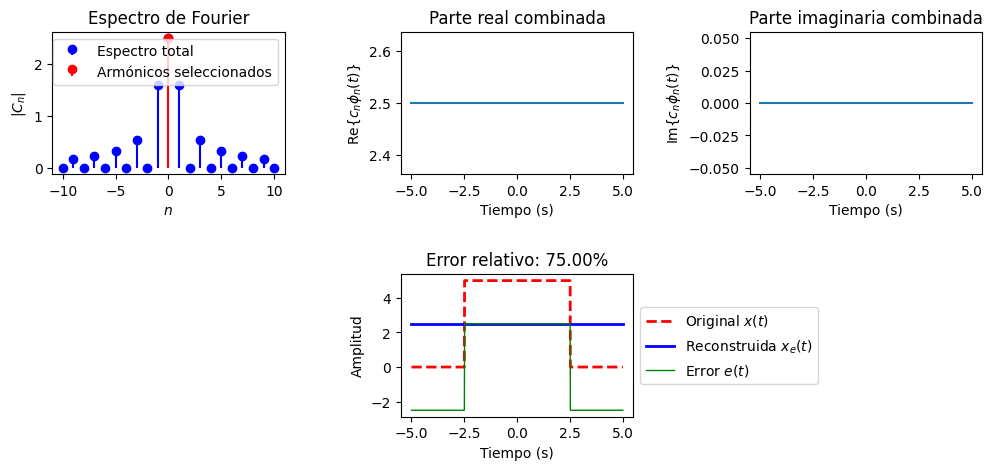

In [29]:
# Crear figura y ejes para la animación de los resultados
fig, ax = plt.subplots(2, 3, figsize=(12, 5))  # 2 filas, 3 columnas de subplots

# Función de actualización para cada cuadro de la animación
def update(n):
    """
    Dibuja en cada subplot:
      - El espectro completo y los armónicos seleccionados.
      - Componentes reales e imaginarias de la contribución espectral.
      - Señal reconstruida y error en el tiempo.

    Parámetros
    ----------
    n : int
        Número de armónicos positivos a incluir en este fotograma.
    """
    # Limpiar cada uno de los ejes antes de dibujar
    for i in range(2):
        for j in range(3):
            ax[i, j].clear()

    # Selección de armónicos de interés (índices de N-n a N+n)
    indices = np.arange(N - n, N + n + 1)

    # Subplot [0,0]: espectro completo y resaltado de los armónicos usados
    ax[0, 0].stem(nv, np.abs(Cn), linefmt='b-', markerfmt='bo', basefmt=' ', label='Espectro total')
    ax[0, 0].stem(nv[indices], np.abs(Cn[indices]), linefmt='r-', markerfmt='ro', basefmt=' ', label='Armónicos seleccionados')
    ax[0, 0].set_xlabel(r'$n$')
    ax[0, 0].set_ylabel(r'$|C_n|$')
    ax[0, 0].legend(loc='upper right')
    ax[0, 0].set_title('Espectro de Fourier')

    # Cálculo de las contribuciones espectrales combinadas
    ce = phin[:, indices].dot(np.diag(Cn[indices]))

    # Subplot [0,1]: parte real de la suma de componentes
    ax[0, 1].plot(tv, np.real(ce))
    ax[0, 1].set_xlabel('Tiempo (s)')
    ax[0, 1].set_ylabel(r'Re$\{c_n\phi_n(t)\}$')
    ax[0, 1].set_title('Parte real combinada')

    # Subplot [0,2]: parte imaginaria de la suma de componentes
    ax[0, 2].plot(tv, np.imag(ce))
    ax[0, 2].set_xlabel('Tiempo (s)')
    ax[0, 2].set_ylabel(r'Im$\{c_n\phi_n(t)\}$')
    ax[0, 2].set_title('Parte imaginaria combinada')

    # Reconstrucción de la señal y cálculo del error
    xe = phin[:, indices].dot(Cn[indices])  # señal aproximada
    er = 1 - np.sum(np.abs(Cn[indices])**2) / Px  # error relativo total
    et = xo - xe  # error instantáneo en el dominio del tiempo

    # Subplot [1,1]: comparación señal original, reconstruida y error
    ax[1, 1].plot(tv, xo, 'r--', linewidth=2, label='Original $x(t)$')
    ax[1, 1].plot(tv, xe, 'b-', linewidth=2, label='Reconstruida $x_e(t)$')
    ax[1, 1].plot(tv, et, 'g-', linewidth=1, label='Error $e(t)$')
    ax[1, 1].set_title(f'Error relativo: {100*er:.2f}%')
    ax[1, 1].set_xlabel('Tiempo (s)')
    ax[1, 1].set_ylabel('Amplitud')
    ax[1, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Ocultar subplots vacíos
    ax[1, 0].axis('off')
    ax[1, 2].axis('off')

    # Ajustar espacios entre subplots para mejor visibilidad
    plt.subplots_adjust(wspace=0.5, hspace=0.7)
    plt.show()

# Configurar y desplegar la animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0, N+1), blit=False)
rc('animation', html='jshtml')


In [30]:
anim

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

#Parte 2:
##Realizar el análisis

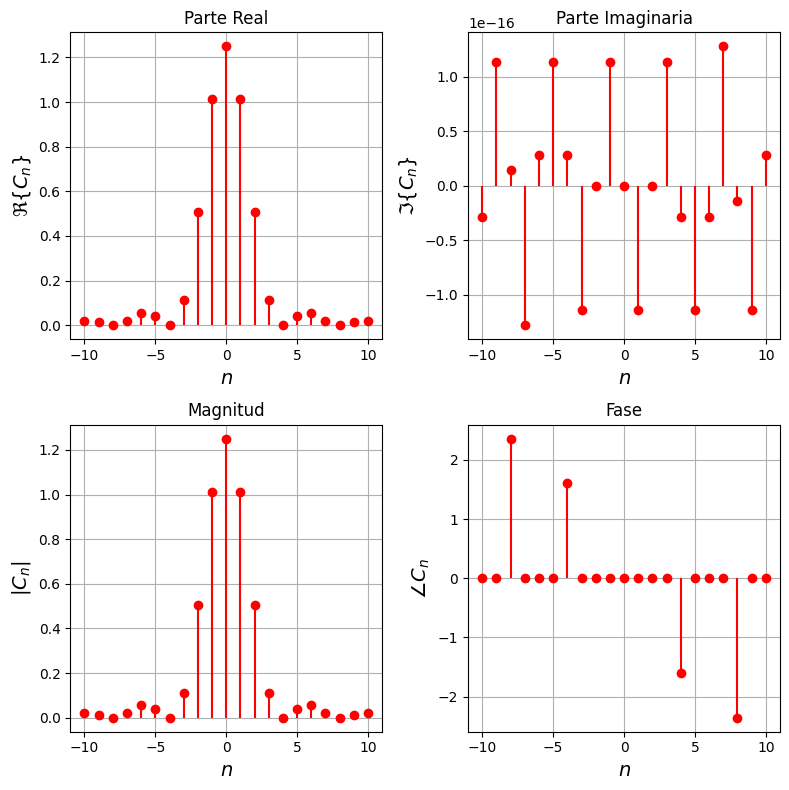

In [31]:
from matplotlib import animation, rc
from IPython.display import HTML
from ipywidgets import interact, IntSlider
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Parámetros principales de la señal
A = 5             # amplitud máxima del pulso
T = 10            # ancho total de la ventana de observación (s)
Fs = 100          # frecuencia de muestreo (Hz)

# Construcción del vector de tiempo centrado en cero
tv = np.arange(-T/2, T/2, 1/Fs)  # instantes de muestreo
Nm = len(tv)                     # número de muestras generadas

# Configuración de la serie de Fourier
N = 10                            # número de armónicos considerados
wo = 2 * np.pi / T               # frecuencia angular fundamental

# Generación de la matriz de funciones base complejas e^{j n ω₀ t}
phin = np.zeros((Nm, 2*N + 1), dtype=np.complex128)
for n in range(-N, N + 1):
    phin[:, n + N] = np.exp(1j * n * wo * tv)

# Definición de la señal de prueba: pulso triangular simétrico
tau = T  # periodo total (ajustable)
xo = A * (1 - 4 * np.abs(tv) / tau) * (np.abs(tv) <= tau / 4)
# el término (np.abs(tv) <= tau/4) aplica la ventana triangular

# Inicialización de arreglo de coeficientes de Fourier
dt = 1 / Fs                        # paso de tiempo para la integración discreta
Cn = np.zeros(2*N + 1, dtype=np.complex128)
nv = np.arange(-N, N + 1)         # vector de índices de armónicos

# Cálculo numérico de los coeficientes Cn mediante suma discreta
for idx, n in enumerate(nv):
    # base compleja conjugada para correlación con la señal
    base = np.exp(-1j * n * wo * tv)
    # aproximación de la integral de Fourier: (1/T) * Σ x(t)·e^{-j n ω₀ t}·Δt
    Cn[idx] = (1 / T) * np.sum(xo * base) * dt

# Visualización detallada del espectro de Fourier en cuatro vistas
fig = plt.figure(figsize=(8, 8))  # figura principal de 8x8 pulgadas

# 1) Componente Real de Cn
plt.subplot(2, 2, 1)  # primera fila, primera columna
plt.stem(nv, np.real(Cn), 'r-', markerfmt='ro', basefmt=' ')  # diagrama de tallos de la parte real
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$\Re\{C_n\}$', fontsize=14)
plt.title('Parte Real')
plt.grid(True)
plt.axis('tight')

# 2) Componente Imaginaria de Cn
plt.subplot(2, 2, 2)  # primera fila, segunda columna
plt.stem(nv, np.imag(Cn), 'r-', markerfmt='ro', basefmt=' ')  # diagrama de tallos de la parte imaginaria
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$\Im\{C_n\}$', fontsize=14)
plt.title('Parte Imaginaria')
plt.grid(True)
plt.axis('tight')

# 3) Magnitud del espectro |Cn|
plt.subplot(2, 2, 3)  # segunda fila, primera columna
plt.stem(nv, np.abs(Cn), 'r-', markerfmt='ro', basefmt=' ')  # tallos de magnitudes absolutas
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$|C_n|$', fontsize=14)
plt.title('Magnitud')
plt.grid(True)
plt.axis('tight')

# 4) Fase de Cn (ángulo)
plt.subplot(2, 2, 4)  # segunda fila, segunda columna
plt.stem(nv, np.angle(Cn), 'r-', markerfmt='ro', basefmt=' ')  # tallos de la fase en radianes
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$\angle C_n$', fontsize=14)
plt.title('Fase')
plt.grid(True)
plt.axis('tight')

# Ajuste de la distribución de subplots para evitar solapamientos
fig.tight_layout()


In [32]:
Px = A**2 # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,xo,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=10, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

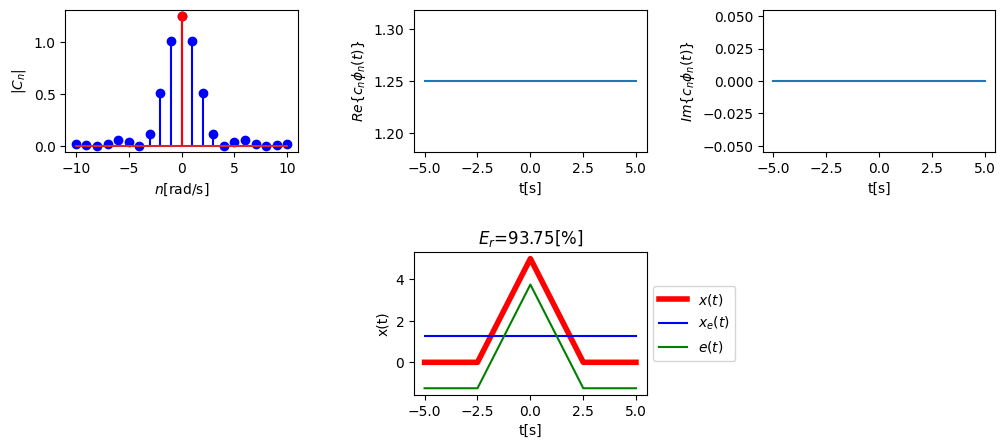

In [33]:
#figura y axes animaciónx
fig, ax = plt.subplots(2, 3,figsize=(12,5))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax[0,0].clear()
    ax[0,1].clear()
    ax[0,2].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    ax[1,2].clear()

    #espectro
    ind = np.arange(N-n,N+n+1) #armónicos a considerar
    ax[0,0].stem(nv, abs(Cn), 'b')#magnitud del espectro
    ax[0,0].stem(nv[ind], abs(Cn[ind]), 'r')#magnitud del espectro
    ax[0,0].set_xlabel(r'$n$[rad/s]')
    ax[0,0].set_ylabel(r'$|C_n|$')

    #componentes espectrales
    ce = phin[:,ind].dot(np.diag(Cn[ind]) )
    ax[0,1].plot(tv,np.real(ce))#componente real
    ax[0,1].set_xlabel('t[s]')
    ax[0,1].set_ylabel('$Re\{c_n\phi_n(t)\}$')

    ax[0,2].plot(tv,np.imag(ce))#componente imaginario
    ax[0,2].set_xlabel('t[s]')
    ax[0,2].set_ylabel('$Im\{c_n\phi_n(t)\}$')




    #reconstruccion
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    #error en t
    et = xo - xe

    ax[1,1].plot(tv,xo,'r',linewidth=4,label='$x(t)$')
    ax[1,1].plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    ax[1,1].plot(tv,et,color='g',label='$e(t)$') # señal estimada o filtrada
    ax[1,1].set_title('$E_r$=%.2f[%%]' % (100*er))
    ax[1,1].set_xlabel('t[s]')
    ax[1,1].set_ylabel('x(t)')
    ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1,0].axis('off')
    ax[1,2].axis('off')
    plt.subplots_adjust(wspace=0.5,hspace=0.7)
    plt.show()

#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0,N+1,1), blit=False)
rc('animation', html='jshtml')

In [34]:
anim

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>